,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Range,Value,Returns,...,AbsPercentChange,DeTrend,Normalised,Year,Month,Doy,Week,DayName,Hour,Date
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-01 11:00:00,BTCUSD,2506.50,2510.62,2495.50,2500.00,208.52,521903.70,15.12,2500.00,NaN,...,NaN,2500.000000,-1.530610,2017,7,182,26,Saturday,11,2017-07-01 11:00:00
2017-07-01 12:00:00,BTCUSD,2500.00,2503.69,2488.25,2495.62,243.08,607308.42,15.44,2495.62,-4.38,...,0.001752,2495.596391,-1.532005,2017,7,182,26,Saturday,12,2017-07-01 12:00:00
2017-07-01 13:00:00,BTCUSD,2495.62,2495.62,2433.59,2449.01,579.13,1421546.81,62.03,2449.01,-46.61,...,0.018677,2448.962783,-1.546849,2017,7,182,26,Saturday,13,2017-07-01 13:00:00
2017-07-01 14:00:00,BTCUSD,2449.01,2480.60,2438.88,2457.90,528.75,1302198.58,41.72,2457.90,8.89,...,0.003630,2457.829174,-1.544018,2017,7,182,26,Saturday,14,2017-07-01 14:00:00
2017-07-01 15:00:00,BTCUSD,2457.90,2471.88,2452.10,2466.35,292.31,719666.88,19.78,2466.35,8.45,...,0.003438,2466.255565,-1.541327,2017,7,182,26,Saturday,15,2017-07-01 15:00:00


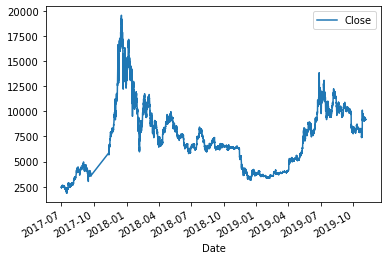

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px

df = pd.read_csv("DATASET.CSV", parse_dates=["Date"], index_col="Date")
df['Date'] = pd.to_datetime(df.index)
df[['Close']].plot()
df.head()

In [21]:
# debugging indexSelector, works well with DateScale only?
from bqplot import pyplot as plt, Figure, Axis
import bqplot as bq
from bqplot.interacts import IndexSelector, FastIntervalSelector
from bqplot.interacts import BrushIntervalSelector
from ipywidgets import ToggleButtons, VBox, HTML
import ipywidgets as widgets

class Slicer:
    
    db_index = HTML(value='[]')
    
    def selector_plot(self, df, x_col, y_col):

        def index_change_callback(change):
            if len(change.new) == 2:
                self.start_date = pd.to_datetime(change.new[0])
                self.end_date = pd.to_datetime(change.new[1])
                self.db_index.value = 'The selected date is ' + str(change.new)
                # self.sub_plot_fig = self.sub_plot()

        self.x_col = x_col
        self.y_col = y_col
        self.df = df
        
        # x_sc = bq.LinearScale()
        x_sc = bq.DateScale()
        # y_sc = bq.LogScale()
        y_sc = bq.LinearScale()

        x_ax = Axis(label=x_col, scale=x_sc)
        x_ay = Axis(label=(y_col), scale=y_sc, orientation='vertical')
        lc = bq.Lines(x=df[x_col], y=df[y_col], scales={'x': x_sc, 'y': y_sc})

        selector = BrushIntervalSelector(scale=x_sc, marks=[lc])    
        selector.observe(index_change_callback, names=['selected'])
        self.selector_fig = Figure(marks=[lc], axes=[x_ax, x_ay], interaction=selector)
        return self.selector_fig

    def sub_plot(self):
        x_col = self.x_col
        y_col = self.y_col
        
        if hasattr(self, "start_date"):
            print (type(self.start_date))
            print (self.start_date)
            self.df_slice = self.df[self.start_date:self.end_date]
        else:
            self.df_slice = self.df
        
        # x_sc = bq.LinearScale()
        x_sc = bq.DateScale()
        # y_sc = bq.LogScale()
        y_sc = bq.LinearScale()

        x_ax = Axis(label=x_col, scale=x_sc)
        x_ay = Axis(label=(y_col), scale=y_sc, orientation='vertical')
        lc = bq.Lines(x=self.df_slice[x_col], y=self.df_slice[y_col], scales={'x': x_sc, 'y': y_sc})

        self.sub_plot_fig = Figure(marks=[lc], axes=[x_ax, x_ay])
        return self.sub_plot_fig

slicer = Slicer()
slicer.selector_plot(df, "Date", "Close")

VBox([slicer.db_index, slicer.selector_fig])

In [23]:
slicer.sub_plot()
slicer.df_slice.to_csv("DATASET.CSV")


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2017-12-13 13:38:09.950000
